### Classification Neural Network

https://www.kaggle.com/joosthazelzet/lego-brick-images

### load and vsualize data  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os 

In [2]:
# save the path of the data 
data_path = 'lego-data/LEGO brick images v1'

# data saved in subfiles according to its type 

In [3]:
# set function 'load_images' to load data subfiles 
def load_images(path):
    
   # initialize list that store the training images 

    images_train =[]
    labels_train =[]
    
    # itirate through every subfolder and print full path to the screen
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path,sub_folder)
        print(fullpath)
        
        # if the the current path is not a directory just continue 
        if not os.path.isdir(fullpath):
            continue
        
        # get the list of images located under each subfolder by calling os.listdir  
        images = os.listdir(fullpath)
        
        # nested for loop in order to iterate over everyimage file in the subfolder 
        for image_filename in images:
            
            # get the full path to the image 
            image_fullpath = os.path.join(fullpath, image_filename)
            # check if the path is a directory  continue 
            if os.path.isdir(image_fullpath):
                continue 
                # use the open cv library to read the content of image file
            img = cv2.imread(image_fullpath)
            # append the image to the list of training images 
            images_train.append(img)
            # the label is the name of the subfolder 
            labels_train.append(sub_folder)
            
            
    return np.array(images_train), np.array(labels_train)

In [4]:
images_train, labels_train = load_images(data_path)

lego-data/LEGO brick images v1\11214 Bush 3M friction with Cross axle
lego-data/LEGO brick images v1\18651 Cross Axle 2M with Snap friction
lego-data/LEGO brick images v1\2357 Brick corner 1x2x2
lego-data/LEGO brick images v1\3003 Brick 2x2
lego-data/LEGO brick images v1\3004 Brick 1x2
lego-data/LEGO brick images v1\3005 Brick 1x1
lego-data/LEGO brick images v1\3022 Plate 2x2
lego-data/LEGO brick images v1\3023 Plate 1x2
lego-data/LEGO brick images v1\3024 Plate 1x1
lego-data/LEGO brick images v1\3040 Roof Tile 1x2x45deg
lego-data/LEGO brick images v1\3069 Flat Tile 1x2
lego-data/LEGO brick images v1\32123 half Bush
lego-data/LEGO brick images v1\3673 Peg 2M
lego-data/LEGO brick images v1\3713 Bush for Cross Axle
lego-data/LEGO brick images v1\3794 Plate 1X2 with 1 Knob
lego-data/LEGO brick images v1\6632 Technic Lever 3M


In [5]:
images_train.shape

(6379, 200, 200, 3)

In [6]:
images_train[5].shape

(200, 200, 3)

In [7]:
labels_train.shape

(6379,)

label: 2357 Brick corner 1x2x2


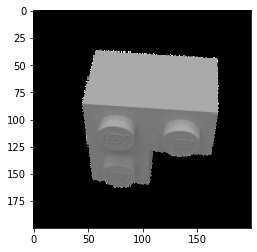

In [8]:
# picked image at random index (1000)
plt.imshow(images_train[1000])
print('label:', labels_train[1000])

### building and training the classifier NN

In [9]:
# reshape the images into a single dimensional data
# ( batch_size, (height*width*channels))
x = images_train.reshape(images_train.shape[0],
                         images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [10]:
x.shape

(6379, 120000)

###### notice 6379 batch size and each image is flatned to be one dimentional vector

In [11]:
# encoding label from string format to numeric 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(labels_train)

In [12]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [13]:
# split data into training and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True, test_size= 0.2)
x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [14]:
#instantiate a neural network 
# 3 hidden layer with each layer containing a 100 neurons 
from sklearn.neural_network import MLPClassifier
clf_image = MLPClassifier(activation = 'relu',
                         hidden_layer_sizes =(100,100,100),
                         solver='adam',
                         verbose= True,
                         max_iter=100)

In [15]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 38.17341241
Iteration 3, loss = 13.36561461
Iteration 4, loss = 10.24778120
Iteration 5, loss = 7.34236200
Iteration 6, loss = 6.65090256
Iteration 7, loss = 6.06781230
Iteration 8, loss = 7.25944075
Iteration 9, loss = 4.50258628
Iteration 10, loss = 3.11607901
Iteration 11, loss = 3.87501846
Iteration 12, loss = 3.04516743
Iteration 13, loss = 2.15054111
Iteration 14, loss = 1.95637621
Iteration 15, loss = 1.46708966
Iteration 16, loss = 1.32364647
Iteration 17, loss = 2.20052252
Iteration 18, loss = 1.40971025
Iteration 19, loss = 1.23834789
Iteration 20, loss = 1.16176205
Iteration 21, loss = 0.80798606
Iteration 22, loss = 0.90215477
Iteration 23, loss = 0.50253416
Iteration 24, loss = 0.95366499
Iteration 25, loss = 2.02302900
Iteration 26, loss = 0.97729347
Iteration 27, loss = 1.20933540
Iteration 28, loss = 1.01132325
Iteration 29, loss = 1.90026068
Iteration 30, loss = 2.40282515
Iteration 31, loss = 3.73411381
Iteration 32, loss = 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [16]:
y_pred= clf_image.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.8009404388714734